In [2]:
import sys
print(sys.executable)

c:\Users\Candra\Documents\Coding Python\projects\image_generator\sd311\Scripts\python.exe


In [3]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt

c:\Users\Candra\Documents\Coding Python\projects\image_generator\sd311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 25/25 [00:07<00:00,  3.46it/s]


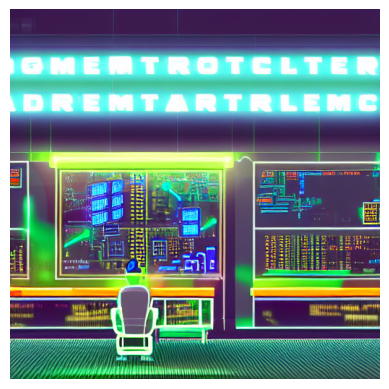

In [4]:
torch.cuda.empty_cache()

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

pipe.enable_attention_slicing()

prompt = "a programmer coding python, cyberpunk style, ultra detailed, neon lighting, cinematic"
negative_prompt = "blurry, low quality, distorted, bad anatomy"

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=512,
    height=512,
    guidance_scale=7.5,
    num_inference_steps=25
).images[0]

plt.imshow(image)
plt.axis("off")
plt.show()